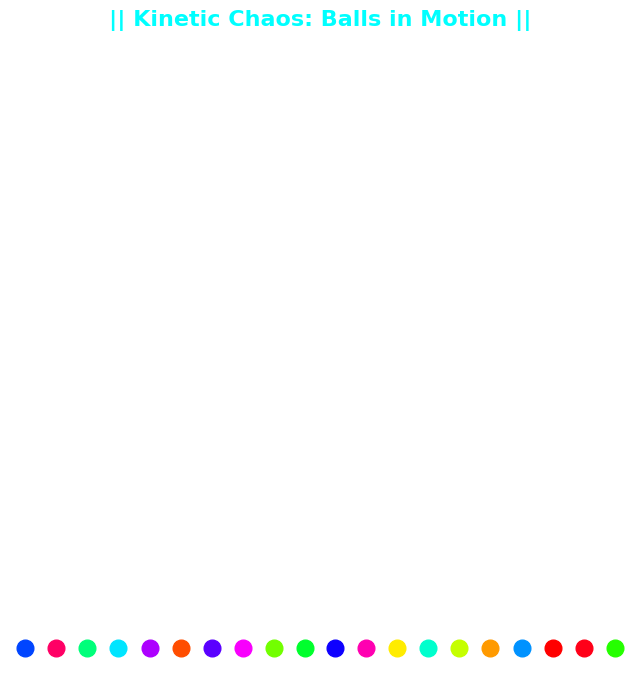

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# ---------------------------------
# Physics and Visual Parameters
# ---------------------------------
num_balls = 20
ball_radius = 0.5
gravity = -0.1
damping = 0.98
restitution = 0.9
bounds = [-10, 10, 0, 15]  # [xmin, xmax, ymin, ymax]
colors = plt.cm.hsv(np.linspace(0, 1, num_balls))

# ---------------------------------
# Initial: One Central Ball
# ---------------------------------
positions = np.zeros((num_balls, 2))
positions[:, 0] = 0  # All start at x=0
positions[:, 1] = 7  # All start at y=7 (center height)

angles = np.linspace(0, 2*np.pi, num_balls, endpoint=False)
speeds = np.random.uniform(2, 4, num_balls)
velocities = np.stack((np.cos(angles)*speeds, np.sin(angles)*speeds), axis=1)

# ---------------------------------
#  Visualization Setup
# ---------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[2], bounds[3])
ax.set_facecolor("#111133")  # Dark bluish background
ax.axis('off')
ax.set_title("|| Kinetic Chaos: Balls in Motion ||", fontsize=16, color='cyan', pad=20, weight='bold')

ball_artists = []
for c in colors:
    ball, = ax.plot([], [], 'o', markersize=12, color=c)
    ball_artists.append(ball)

# ---------------------------------
#  Ball Collision Function
# ---------------------------------
def handle_collisions(pos, vel):
    for i in range(num_balls):
        for j in range(i + 1, num_balls):
            dist = np.linalg.norm(pos[i] - pos[j])
            if dist < 2 * ball_radius:
                delta = pos[i] - pos[j]
                delta /= np.linalg.norm(delta) + 1e-6

                # Move apart
                overlap = 2 * ball_radius - dist
                pos[i] += delta * (overlap / 2)
                pos[j] -= delta * (overlap / 2)

                # Swap velocity components along collision direction
                vi, vj = vel[i], vel[j]
                vel_diff = vi - vj
                vel[i] = vi - np.dot(vel_diff, delta) * delta
                vel[j] = vj - np.dot(-vel_diff, -delta) * -delta
    return pos, vel

# ---------------------------------
#  Animate
# ---------------------------------
def animate(frame):
    global positions, velocities

    all_stopped = True

    for i in range(num_balls):
        # Apply gravity
        velocities[i][1] += gravity

        # Update position
        positions[i] += velocities[i]

        # Bounce off walls and floor/ceiling
        if positions[i][0] - ball_radius < bounds[0]:
            positions[i][0] = bounds[0] + ball_radius
            velocities[i][0] *= -restitution

        if positions[i][0] + ball_radius > bounds[1]:
            positions[i][0] = bounds[1] - ball_radius
            velocities[i][0] *= -restitution

        if positions[i][1] - ball_radius < bounds[2]:
            positions[i][1] = bounds[2] + ball_radius
            velocities[i][1] *= -restitution

        if positions[i][1] + ball_radius > bounds[3]:
            positions[i][1] = bounds[3] - ball_radius
            velocities[i][1] *= -restitution

        # Damping to simulate resistance
        velocities[i] *= damping

        # Check if it's stopped on the floor
        low_speed = np.linalg.norm(velocities[i]) < 0.08
        near_floor = np.abs(positions[i][1] - (bounds[2] + ball_radius)) < 0.1
        if not (low_speed and near_floor):
            all_stopped = False

    # Handle ball-ball collisions
    positions, velocities = handle_collisions(positions, velocities)

    # Update visual positions
    for i, ball in enumerate(ball_artists):
        ball.set_data([positions[i][0]], [positions[i][1]])

    if all_stopped:
        ani.event_source.stop()

    return ball_artists

# ---------------------------------
#  Launch the Animation
# ---------------------------------
ani = animation.FuncAnimation(fig, animate, frames=300, interval=60, blit=True)
HTML(ani.to_jshtml())
